In [1]:
#importing
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import pylab
import glob
from scipy import interpolate
import math

%matplotlib inline


import pickle, json

import matplotlib as mpl
Paper_style = json.load(open("Paperstyle.json",'r'))
mpl.style.use(Paper_style)

In [2]:
#Let us begin with the discrete values
epsilon = np.arange(12, dtype= 'f')
epsilon[0] = 3.0
epsilon[1] = 8.0
epsilon[2] = 15.0
epsilon[3] = 30.0
epsilon[4] = 38.0
epsilon[5] = 40.0
epsilon[6] = 45.0
epsilon[7] = 50.0
epsilon[8] = 55.0
epsilon[9] = 60.0
epsilon[10] = 100.0
epsilon[11] = 200.0

#mobilities
#PIC
mu_PIC = np.arange(12, dtype= 'f')
mu_PIC[0] = 6.1
mu_PIC[1] = 6.0
mu_PIC[2] = 5.9
mu_PIC[3] = 5.6
mu_PIC[4] = 5.6
mu_PIC[5] = 6.0
mu_PIC[6] = 5.7
mu_PIC[7] = 5.6
mu_PIC[8] = 5.6
mu_PIC[9] = 5.6
mu_PIC[10] = 5.8
mu_PIC[11] = 5.67

#Effective
mu_EFF = np.arange(12, dtype= 'f')
mu_EFF[0] = 5.2
mu_EFF[1] = 4.92
mu_EFF[2] = 4.9
mu_EFF[3] = 4.2
mu_EFF[4] = 4.1
mu_EFF[5] = 4.7
mu_EFF[6] = 4.9
mu_EFF[7] = 4.4
mu_EFF[8] = 4.4
mu_EFF[9] = 4.4
mu_EFF[10] = 5.1
mu_EFF[11] = 5.0

#classical
mu_CLA = np.arange(12, dtype= 'f')
mu_CLA[0] = 0.2
mu_CLA[1] = 0.2
mu_CLA[2] = 0.2
mu_CLA[3] = 0.2
mu_CLA[4] = 0.19
mu_CLA[5] = 0.21
mu_CLA[6] = 0.20
mu_CLA[7] = 0.22
mu_CLA[8] = 0.22
mu_CLA[9] = 0.22
mu_CLA[10] = 0.22
mu_CLA[11] = 0.22

#saturation
mu_SAT = np.arange(12, dtype= 'f')
mu_SAT[0] = 3.1
mu_SAT[1] = 3.1
mu_SAT[2] = 3.2
mu_SAT[3] = 3.3
mu_SAT[4] = 3.4
mu_SAT[5] = 3.5
mu_SAT[6] = 3.6
mu_SAT[7] = 3.75
mu_SAT[8] = 3.8
mu_SAT[9] = 3.75
mu_SAT[10] = 3.75
mu_SAT[11] = 3.75


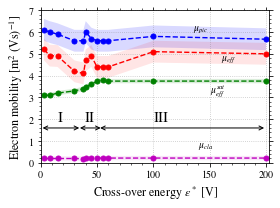

In [5]:
#ploting
fig,ax = plt.subplots(1, figsize=(4,3))

ax.plot(epsilon,mu_PIC,label='$\mu_{pic}$',marker='o',linestyle='--',color='b',linewidth=1.4)
ax.plot(epsilon,mu_EFF,label='$\mu_{eff}$',marker='o',linestyle='--',color='r',linewidth=1.4)
ax.plot(epsilon,mu_SAT,label='$\mu_{eff}^{sat}$',marker='o',linestyle='--',color='g',linewidth=1.4)
ax.plot(epsilon,mu_CLA,label='$\mu_{cla}$',marker='o',linestyle='--',color='m',linewidth=1.4)

#zones d'erreur autour des lignes de valeur
plt.fill_between(epsilon,mu_PIC-0.5,mu_PIC+0.5,alpha=0.15,facecolor='b')
plt.fill_between(epsilon,mu_EFF-0.5,mu_EFF+0.5,alpha=0.1,facecolor='r')
plt.fill_between(epsilon,mu_SAT-0.1,mu_SAT+0.1,alpha=0.15,facecolor='g')
plt.fill_between(epsilon,mu_CLA-0.1,mu_CLA+0.1,alpha=0.1,facecolor='m')

plt.xlabel('Cross-over energy $\epsilon^*$ [V]')
plt.ylabel("Electron mobility [m$^2$ (Vs)$^{-1}$]")
plt.xlim([0,203])
plt.ylim([0,7])

#regimes with the arrows
arrow = True
if arrow:
    plt.annotate(s='', xy=(0.00,1.6), xytext=(36.0,1.6), arrowprops=dict(arrowstyle='<->'))
    plt.annotate(s='', xy=(33.1,1.6), xytext=(55,1.6), arrowprops=dict(arrowstyle='<->'))
    plt.annotate(s='', xy=(51.0,1.6), xytext=(200,1.6), arrowprops=dict(arrowstyle='<->'))

    plt.text(15.0,1.9,r'I',fontsize=15)
    plt.text(39.0,1.9,r'II',fontsize=15)
    plt.text(100.0,1.9,r'III',fontsize=15)

#rectabgle patch
#currentAxis = plt.gca()
#currentAxis.add_patch(patches.Rectangle( (38.5,0.0), 10.0, 280., facecolor='0.7', edgecolor="none", alpha=0.3))

#legend outside the box

#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=2, fancybox=False, shadow=False)
text_size = 9.5
kwargs = {"size":text_size}#, "backgroundcolor":"w" }

plt.text(135,6.05,r'$\mu_{pic}$',**kwargs,)
plt.text(160,4.7,r'$\mu_{eff}$',**kwargs,)
plt.text(140,0.7,r'$\mu_{cla}$',**kwargs,)
plt.text(150,3.2,r'$\mu_{eff}^{sat}$',**kwargs,)
#ax.legend(loc='lower center',ncol=2)

plt.savefig('../parametric_mobs_eps_complete.pdf')
